In [96]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

In [98]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Walmart.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "yasserh/walmart-dataset",
    file_path,
)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_3608\1671988895.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [99]:
df.sample(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3707,26,17-08-2012,1068292.56,0,65.54,3.840,138.185710,7.405
2567,18,14-09-2012,960476.10,0,64.45,3.988,138.567300,8.535
4294,31,05-03-2010,1384870.51,0,48.61,2.625,211.006754,8.324
306,3,25-06-2010,357346.48,0,83.79,2.653,214.666074,7.343
2613,19,05-11-2010,1435379.25,0,41.78,3.049,132.924581,8.067
958,7,06-01-2012,713117.66,0,18.67,3.095,196.545831,8.256
4530,32,16-12-2011,1556017.91,0,26.23,3.266,195.984169,8.513
5475,39,19-11-2010,1370659.54,0,55.50,2.771,210.654290,8.476
1030,8,27-08-2010,888816.78,0,74.92,2.619,214.936279,6.315
4301,31,23-04-2010,1280465.80,0,64.21,2.795,210.100065,8.200


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### Number of stores

In [102]:
df["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

### Converting dates

In [104]:
df['Date'].sample(5)

2744    13-08-2010
4237    28-10-2011
3368    12-08-2011
1612    05-11-2010
2656    02-09-2011
Name: Date, dtype: object

In [105]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week

df=df.drop(columns=['Date'])

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Year          6435 non-null   int32  
 8   Month         6435 non-null   int32  
 9   Day           6435 non-null   int32  
 10  Week          6435 non-null   UInt32 
dtypes: UInt32(1), float64(5), int32(3), int64(2)
memory usage: 458.9 KB


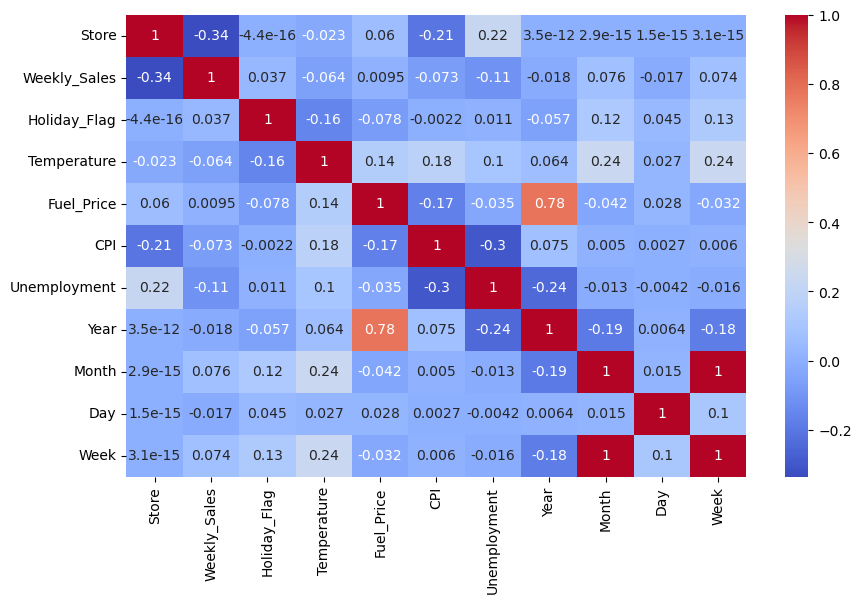

In [107]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


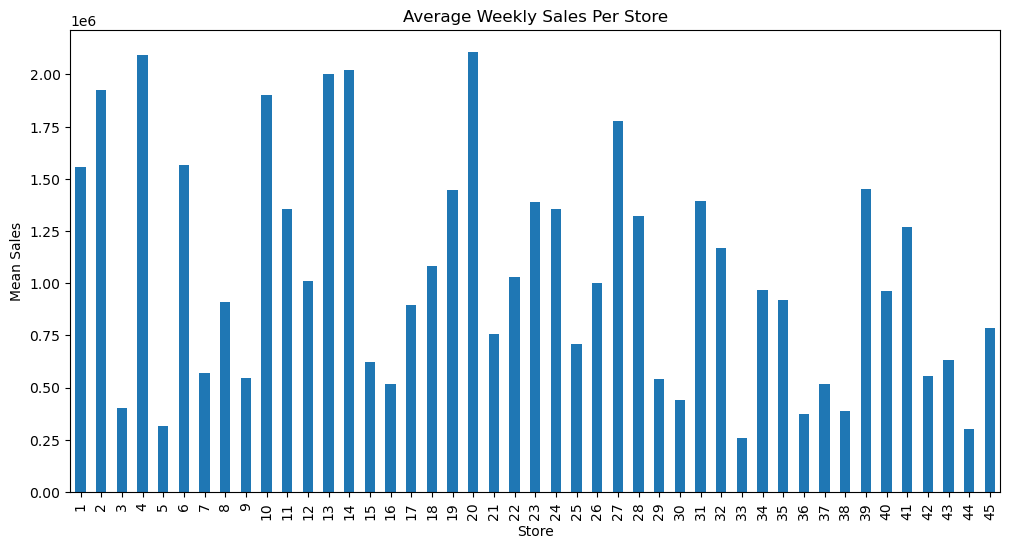

In [108]:
mean_sale_per_store = df.groupby("Store")["Weekly_Sales"].mean()

plt.figure(figsize=(12,6))
mean_sale_per_store.plot(kind="bar")
plt.title("Average Weekly Sales Per Store")
plt.xlabel("Store")
plt.ylabel("Mean Sales")
plt.show()

In [109]:
X = df.drop("Weekly_Sales", axis=1)
y = df["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5148, 10)
Test shape: (1287, 10)


In [110]:
# Fit scaler on training target only
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
# Use y_train_scaled to train your model

y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))

In [111]:
model = LinearRegression()
model.fit(X_train, y_train_scaled)

y_train_pred_scaled = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

### Inverse scaling

In [113]:
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).flatten()
y_test_pred_original = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1,1)).flatten()

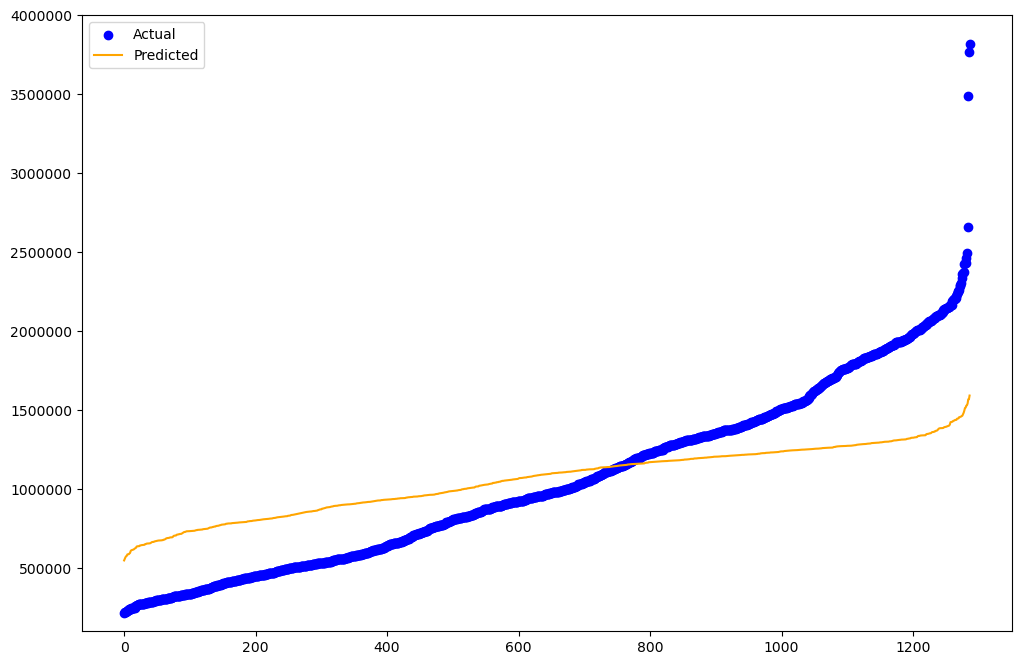

In [114]:
plt.figure(figsize=(12,8))
plt.scatter(range(len(y_test_original)),np.sort(y_test_original), color="blue", label="Actual")
plt.plot(range(len(y_test_pred_original)),np.sort(y_test_pred_original), color="orange", label="Predicted")
plt.legend()
plt.ylim(100000, 4000000)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [115]:
rmse = root_mean_squared_error(y_test_original, y_test_pred_original)
print("Root Mean Squared Error: ", rmse*100)
mape = np.mean(np.abs((y_test_original - y_test_pred_original) / y_test_original)) * 100
print(f"Mean Absolute Percentage Error: {mape:.2f}%")
accuracy = 100 - mape
print(f"Approximate accuracy: {accuracy:.2f}%")

Root Mean Squared Error:  52159606.258291095
Mean Absolute Percentage Error: 62.19%
Approximate accuracy: 37.81%


### Decision Tree

Root Mean Squared Error:  12389513.547495544
Mean Absolute Percentage Error: 6.06%
Approximate accuracy: 93.94%
Train R²: 1.0
Test R²: 0.9523520499800789


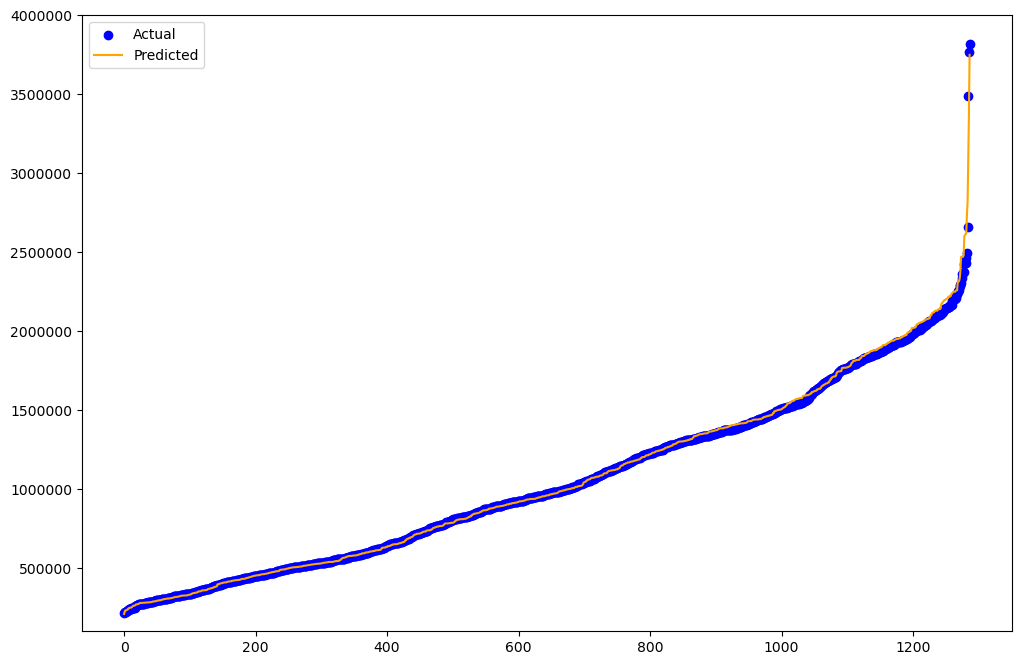

In [141]:
dt_model = DecisionTreeRegressor(random_state=42)

DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_test_pred)
print("Root Mean Squared Error: ", rmse*100)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error: {mape:.2f}%")
accuracy = 100 - mape
print(f"Approximate accuracy: {accuracy:.2f}%")

train_r2 = r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test, y_test_pred)
print("Train R²:", train_r2)
print("Test R²:", test_r2)


plt.figure(figsize=(12,8))
plt.scatter(range(len(y_test)),np.sort(y_test), color="blue", label="Actual")
plt.plot(range(len(y_test_pred)),np.sort(y_test_pred), color="orange", label="Predicted")
plt.legend()
plt.ylim(100000, 4000000)
plt.ticklabel_format(style='plain', axis='y')
plt.show()